In [7]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [8]:
from qiskit import QuantumCircuit, transpile, execute, Aer
from qiskit.visualization import plot_histogram

In [9]:

# Step 1: Create a quantum circuit
qc = QuantumCircuit(3, 3)

In [10]:
# Step 2: Prepare the state to be teleported
# Here, we'll use the Hadamard gate and the X gate to create an arbitrary state
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.x(1)  # Apply X gate to qubit 1

In [11]:
# Step 3: Create an entangled Bell pair (Bell state)
qc.h(1)  # Apply Hadamard gate to qubit 1
qc.cx(1, 2)  # Apply CNOT gate to create an entangled state

In [12]:
# Step 4: Perform a Bell measurement on the two qubits to be teleported
qc.cx(0, 1)  # Apply CNOT gate with qubit 0 as the control and qubit 1 as the target
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.measure([0, 1], [0, 1])  # Measure qubits 0 and 1 and store the results in classical bits 0 and 1

In [14]:
#Step 6: Perform corrections based on the classical information
qc.z(2).c_if(0, 1)  # If the measurement result of qubit 0 is 1, apply Z gate to qubit 2
qc.x(2).c_if(1, 1)  # If the measurement result of qubit 1 is 1, apply X gate to qubit 2


In [15]:
# Step 7: Measure the qubit to be teleported and store the result in a classical bit
qc.measure(2, 2)

In [16]:
# Step 8: Simulate the quantum circuit
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)
job = execute(compiled_circuit, simulator, shots=1024)
result = job.result()

In [17]:
# Step 9: Display the measurement results
counts = result.get_counts()
print("Measurement results:", counts)

Measurement results: {'101': 128, '111': 120, '100': 139, '011': 123, '010': 133, '001': 126, '000': 130, '110': 125}


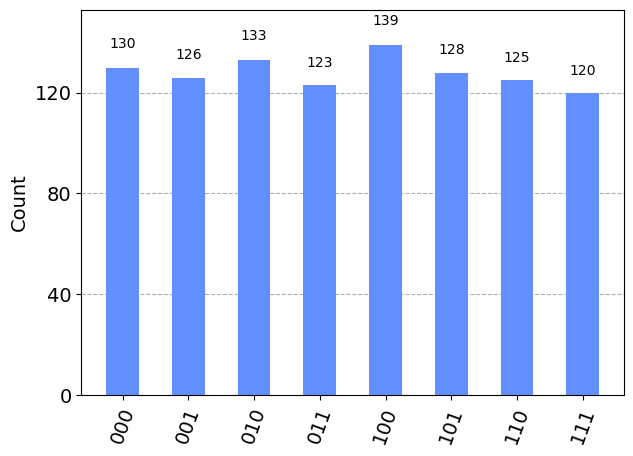

In [18]:
# Visualize the circuit and results
qc.draw(output='mpl')
plot_histogram(counts)

In [22]:
qc.draw()

┌───┐               ┌───┐┌─┐                         
q_0: ┤ H ├────────────■──┤ H ├┤M├─────────────────────────
     ├───┤┌───┐     ┌─┴─┐└┬─┬┘└╥┘                         
q_1: ┤ X ├┤ H ├──■──┤ X ├─┤M├──╫──────────────────────────
     └───┘└───┘┌─┴─┐└───┘ └╥┘  ║    ┌───┐      ┌───┐   ┌─┐
q_2: ──────────┤ X ├───────╫───╫────┤ Z ├──────┤ X ├───┤M├
               └───┘       ║   ║    └─╥─┘      └─╥─┘   └╥┘
                           ║   ║ ┌────╨────┐┌────╨────┐ ║ 
c: 3/══════════════════════╩═══╩═╡ c_0=0x1 ╞╡ c_1=0x1 ╞═╩═
                           1   0 └─────────┘└─────────┘ 2